# Train/dev/test sets
- use to optimize layers, hidden unites, learning rates,activation function
- good in NLP, visions, speech, structured data
- ads, search, secuirty, logisitc
- intuitions do not transfer
- hard to guess hyperparamters first time for any type of topic for application
- idea, code experiemnt
- if training data, have a training set, hold out cross validation set (development set) dev set, test set
- use dev set to see which model performs best, then validate on test set
- in previous era, it was 70/30% this was considered best practice in machine learning
- in modern big data era, then you have dev and test sets are smaller percentage of choices
- train dev and test sets, if large data sets, can set smaller
- more people train on mismatched train/test distribution, training set is from online, dev test sets are from users using app, make sure dev and test sets are from same distributions
- may not need a test set

# Bias Variance
- bias- underfit, high variance - overfitting
- train set error and dev set error
- if training set error is 1% and dev set error is 11%
    - this means you might have overfit the training set
    - this example has high variance
- if training set is 15% and dev set error is 16%
    - assuming humans get 0%, it might be underfitting the data, high bias
- if 0.5% and 1%, low bias and low variance
- if 15% and 30%, high bias and high variance
- if blurry, then Bayes error might be higher



# Basic recipe for machine leanring
- 1. Does algorithm have high bias, look at training data performance, bigger network? , train longer? neural network architecture
- 2. Then check for high variance from dev set performace, get more data, regularization, neural netowrk architecture

whether you have bias or variance could dramatically change what you try, 

if you have bias, getting more trianing data won't help. 
- "Bias variance tradeoff" 
- if you can keep getting more data, always reduces the variance without hurting data too much

# Regularization
- For logistic regression, we try to minimize J
- To add regularization add lambda paramter 
- $$ J(w,b) = \frac{1}{m}\sum_{i=1}^{\infty}L(\hat{y}^{(i)}, y^{(i)}) + \frac{\lambda}{2m}\lVert \mathbf{w} \rVert^{2}_2$$
L2 regularization
- $$\lVert \mathbf{w} \rVert^{2}_2 = \sum_{j=1}^{n_x}w^{2}_j = w^Tw$$
- no need to regularize b
L1 Regularization
- $$\frac{\lambda}{2m}\sum_{j=1}^{n_x}\mid w \mid = \frac{\lambda}{2m}\lVert \mathbf{w} \rVert_1$$
- w will be sparse, can compress, will have zeros, helps with compressing the model, L2 is used more often for neural networks
- lamda is regularization paramter, with development set or cross validation

In a neural network
- $$ J(w^{[1]},b^{[1]}...w^{[L]},w^{[L]}) = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^{(i)}, y^{(i)}) + \frac{\lambda}{2m} \sum_{l=1}^{L}\lVert \mathbf{w^{[l]}} \rVert^{2}$$
- $$ \lVert \mathbf{w^{[l]}} \rVert^{2} = \sum_{i=1}^{n^{[l-1]}}\sum_{j=1}^{n^{[l]}}(w^{[l]}_ij)^2$$
- this is a Frobenius norm of the matrix because dimension of w: $$ (n^{[l]}, n^{[l-1]})$$
- before we would get dW from backprop, then ubdate w
- now add the regularization in backprop
- "Weight decay" 
- with weight you are going to make is smaller

# Why does regularization prevent overfitting
- Why is it that shrinking would reduce overweighting
- ses weights to be close to zero
- simpllifies the network, would bring towards high bias case
- if using tanh, forces it to be in linear region
- if lambda is large, weights are small, then z will be small, then g(z) will be roughly linear,then only linear function, can't get complicated decision boundaries
- 

# Dropout Regularization
- go through each layer of network, and have chance of keeping or getting rid of nodes in layer of a network

To implment "Inverted Dropout"
- illustrate with layer l =3
- d3 (dropout vector for layer 3) = np.randm.rand(a3.shape[0], a3.shape[1]) < keep.prob
- so if keep.prob is 0.8 thne there is 0.2 change it will be removed
- d3 is matrix, there's 
- a3 = np.multiply(a3,d3), will zero out the element that ends up getting canceled out 
- a3 /= keep.prob, will then not change expected value of a3
- say there are 50 units, if 80% and 20% get rid, then 10 units shut off
- for each iteration, it might zero different parts each time

- Making predictions at test time
- No drop out at test time, don't want output to be random
-

# Understanding Dropout
- can't rely on any one feature, need to spread out weights
- will shrink the squared norm of the weights
- have to pick keep.prob, can vary by layer
- don't usually apply dropout to the input layer
- only using when you are overfitting
- downside, cost function is no longer well defined, lose the debugging tool


# Other regularization techniques
- you can do data augmentation, add flipped images, to increase the training set size
- take random crops of the image
- can apply distortions to it
- 
Early Stopping
- run gradient descent, training error on J and dev set error, find the minima of dev set
- stop training halfway only midsize w, pick with smaller norm 
-one downside
- don't want to overfit, but you want to optimize cost function J
- but downside of early stopping, then you  are not optimizing cost function J
- instead just use L2 regularization, but may have to try several values of lambda 

# Normalizing inputs
- training set with two features, normalizing
- subtract the mean, and divide by variance
- now they are both equal to one

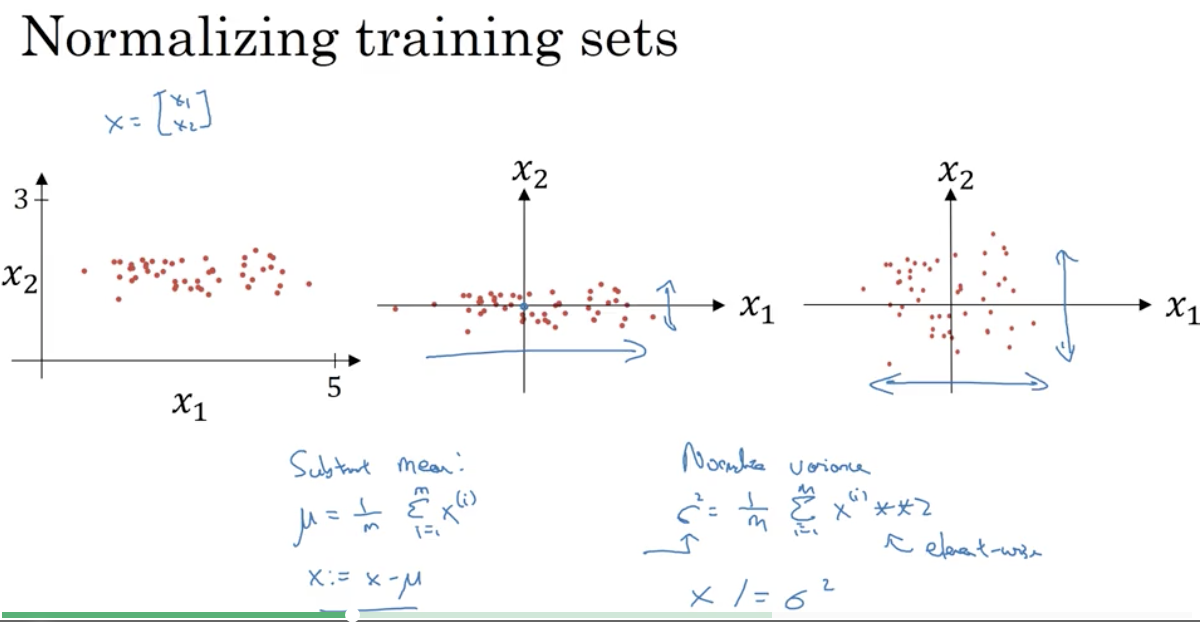

In [2]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-12-07 at 1.21.53 PM.png')

- need to scale test set the same way
- why do we normalize
- if you use unnormalied, will be elongated cost functino, then range of values will take on 
- if normalized, will look like more symmetric cross functino

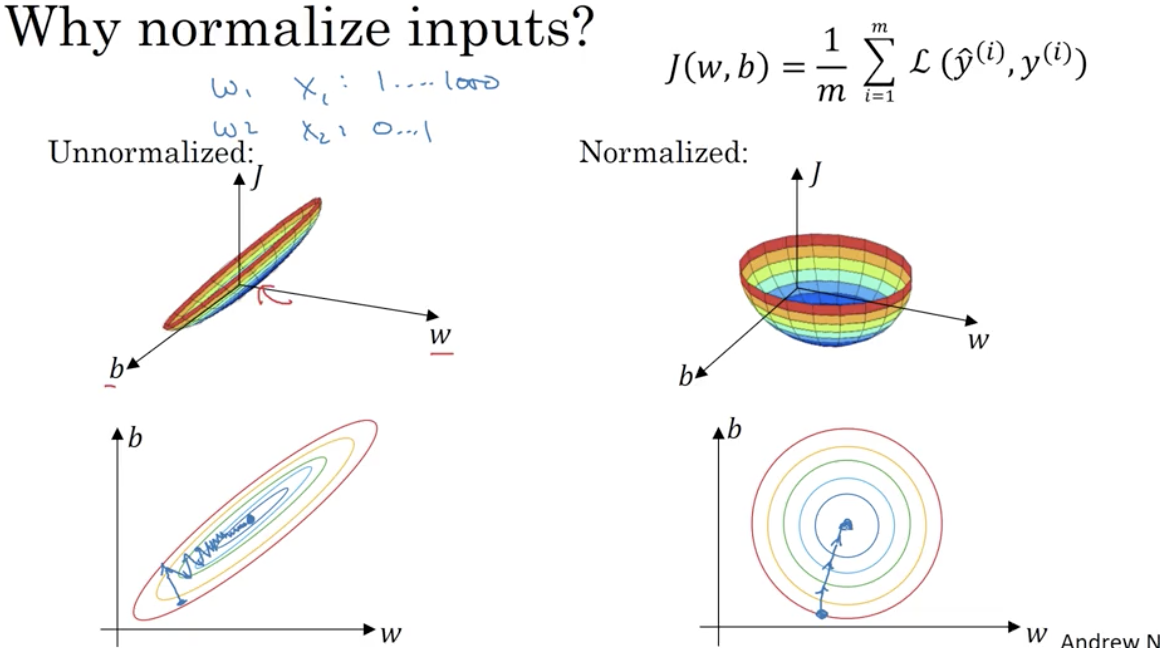

In [4]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-12-07 at 1.25.46 PM.png')

# Vanishing/Exploding Gradients
- if you training a deep neural netowrk
- if you have deep, 1.5 will explode
- if 0.5, if less than 1, exponential decrease
- if weights are >1, then deep netowrk, garident will explode
- if weights are <1 will get very small
- can fix with better weight initialization

# Weight initialization for deep networks
- larger n is, want smaller w
- set variance of w to 1/n
- $$ w^{[l]} = np.random.randn(shape) * np.sqrt(\frac{2}{n^{(l-1)}})$$
- ReLU activation use 
-Other variants: tanh, use constant 1 instead of 2 - Xavier intialization
- if using Relu use the 2 factor
- starting point


# Numiercal Approximation of Gradients
- graident checking, make sure that it is correct
- numerically approximate
- take a two ssided difference
- two sided diffference is better than using one sided difference formula 


# Gradient Checking
- take all parameters a reshape into a big vector theta (ws and b)
- J is then just a function of theta, and put all the others into big vetor dtheta
- Is dtheta the gradient of J(theta)
- For each component of i: compute theta approixmation
- $$ d\theta_(approx)[i] = \frac{J(\theta_1,\theta_2...\theta_{i+\epsilon},...) - J(\theta_1,\theta_2...\theta_{i-\epsilon},...)}{2\epsilon} \approx d\theta_{[i]} = \frac{\partial J}{\partial\theta_i}  $$
- compute for each value of i
- Does $$ d\theta_{approx} \approx d\theta $$
- check
- $$ \frac{\|d\theta_{approx}-d\theta\|_2}{\|d\theta_{approx}\|_2- \|d\theta\|_2} $$
- Use epsilon = 10E-7 if approximate is same order of magnitude, it is good
- how to find bugs

# How to implement gradient checking
- dont use in training- only to debug
- if algorithm fails grad check, look at componenets to try to identitfy bug
- remember regularization hen dtheta must include regularization 
- doesn't work with dropout, turn off dropout and see if it works
- run at random intialization, perhaps again after some training